# Project 1

**Implementation of Neural Nets using Tensorflow Estimator and Tf.Keras**

In [1]:
import warnings
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
df=pd.read_csv('/Users/Documents/Georgian related/assignments/sem 2/NeuralNtwk-Arch/Assignment1/winequality-red.csv')

In [3]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


## Performing EDA

**This is Supervised learning as the output is already given(quality)**

In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


**Checking the datatypes of the features**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


**Every feature except the feature quality was a float datatype. Also the count shows non-null which means it is not missing any value.In the next step the datatpe of feature 'quality' is converted into a float dtype**

In [6]:
df['quality'] = df['quality'].astype(float)

**Checking for any missing values in the dataset(Re-checking)**

In [7]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

**None of the features have missing data**

**Checking for updated changes in the dataset**

In [8]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0


In [9]:
df['quality'].value_counts

<bound method IndexOpsMixin.value_counts of 0       5.0
1       5.0
2       5.0
3       6.0
4       5.0
       ... 
1594    5.0
1595    6.0
1596    6.0
1597    5.0
1598    6.0
Name: quality, Length: 1599, dtype: float64>

**Exploring the dataset using histograms and heatmap**

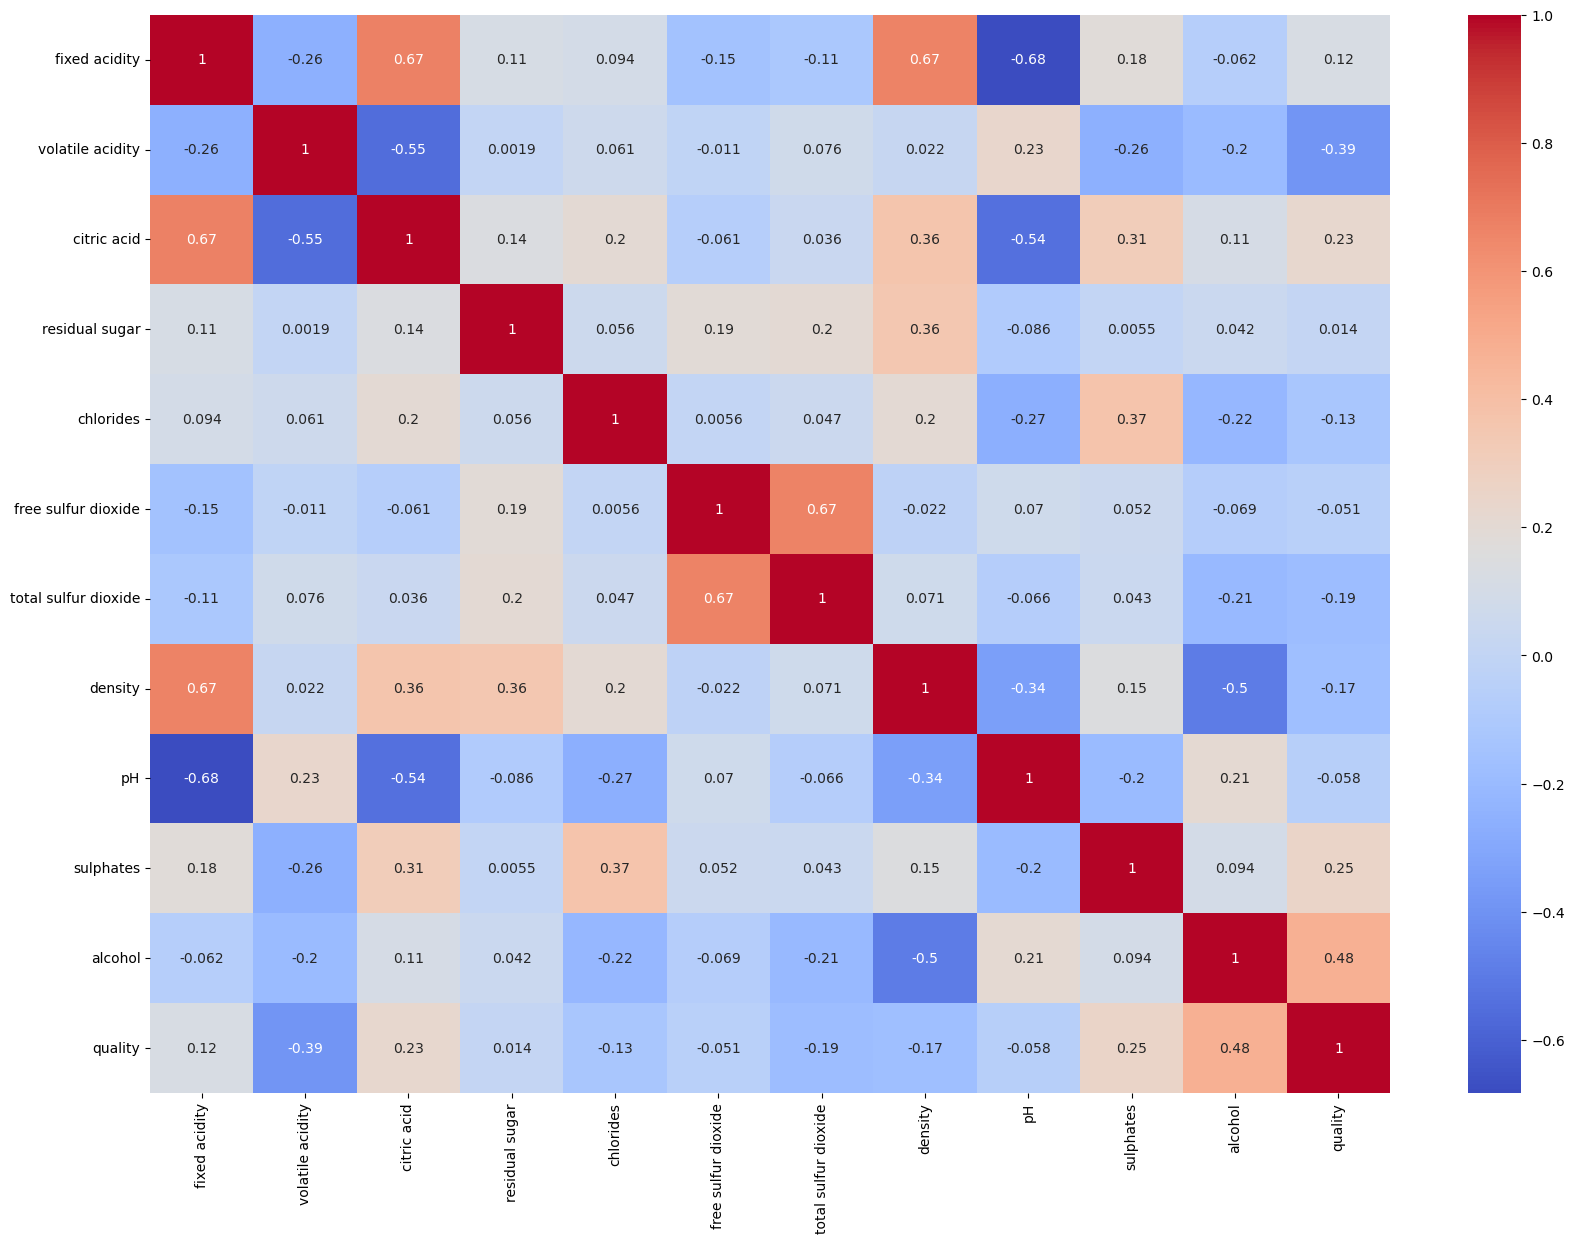

In [10]:
corr=df.corr()
plt.figure(figsize=(20,14))
sea.heatmap(corr,cmap='coolwarm',annot=True)
plt.show()

**Based on the positive and negative correlation features are removed and retained**

**In the next step the less contributory features from the dataset are removed**

In [11]:
del df['pH']
del df['fixed acidity']
del df['chlorides']
del df['sulphates']
del df['free sulfur dioxide']

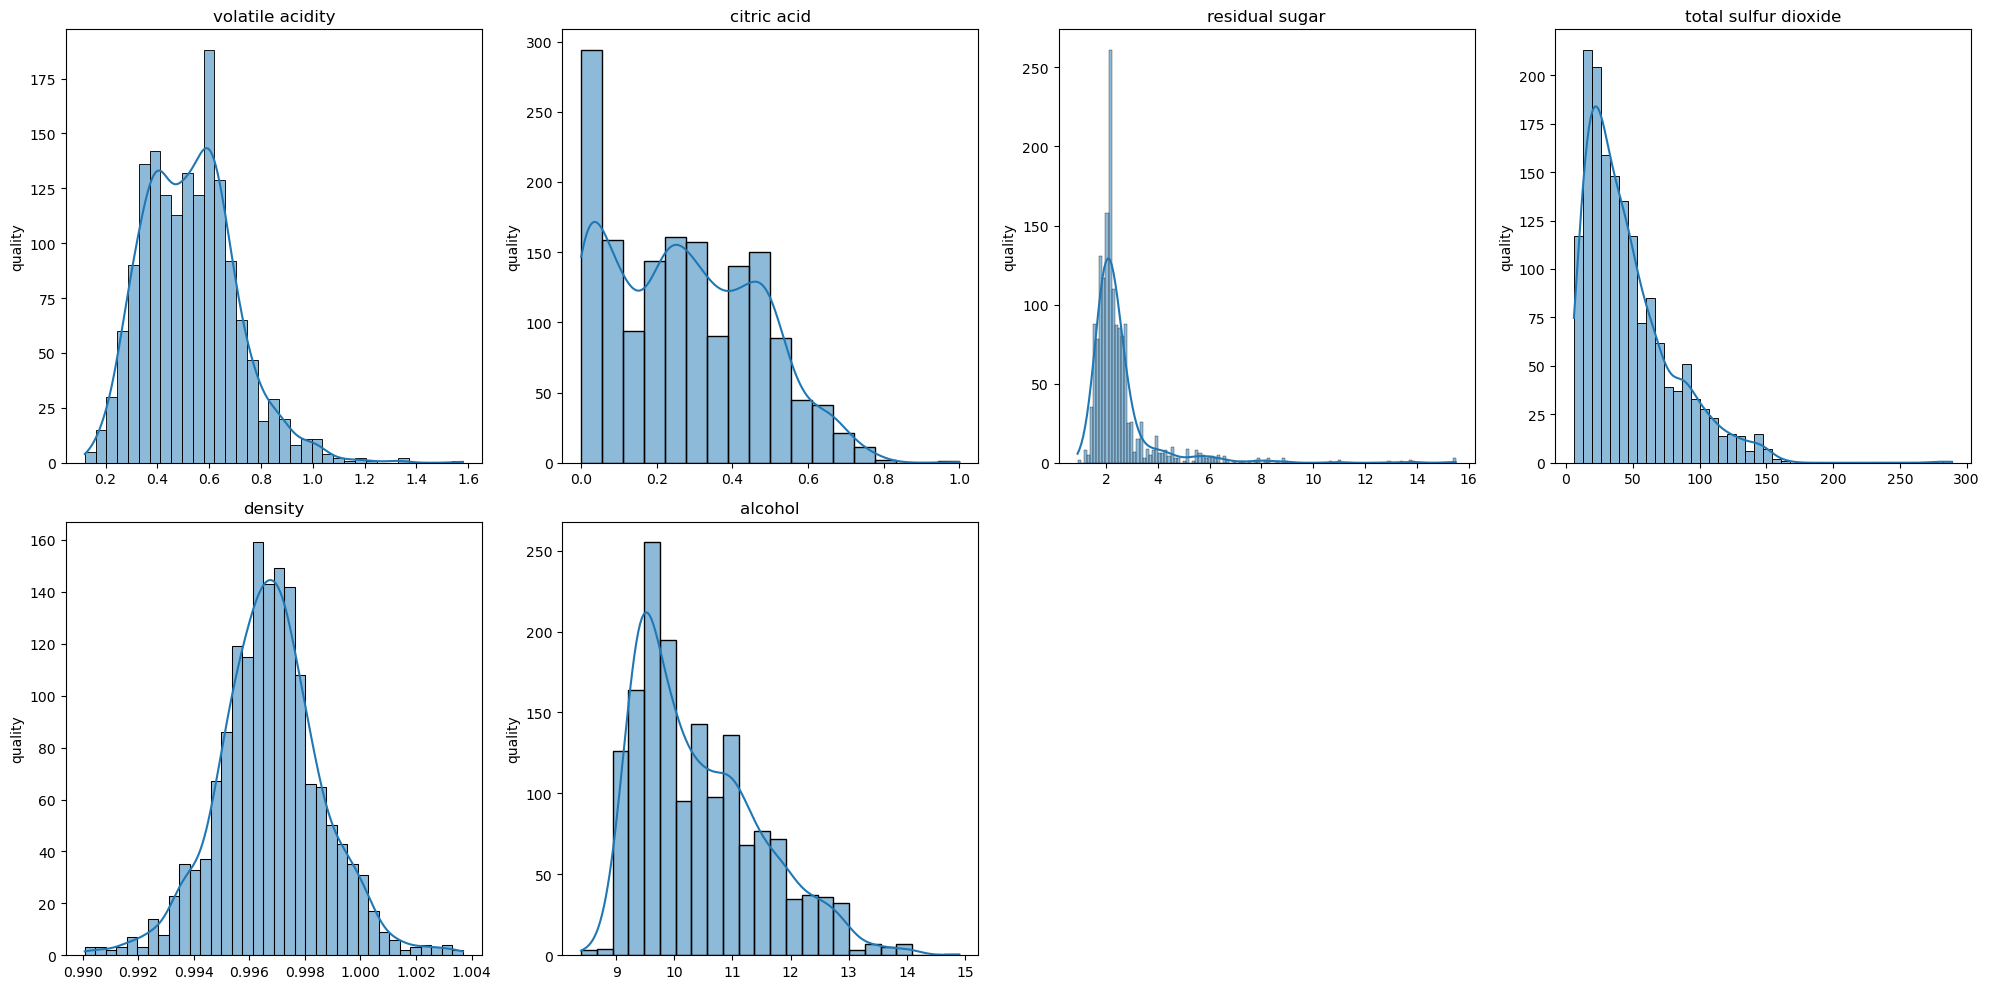

In [12]:
#to print histogram plot of all the features using for loop in one row
plt.figure(figsize=(20, 10))
to_plot = ('volatile acidity', 'citric acid', 'residual sugar',
       'total sulfur dioxide', 'density', 'alcohol')

for i in range(6):
    plt.subplot(2, 4, i+1)
    sea.histplot(df[to_plot[i]],kde=True)
    plt.title(to_plot[i])
    plt.xlabel('')
    plt.ylabel('quality')
    plt.tight_layout()
plt.show()

**Splitting the data into target and features**

In [13]:
X=df.drop('quality',axis=1)
y=df['quality']

**Implementing a Neural Network using TF Estimator DNN Classifier**

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,  y, test_size=0.2, random_state=42)

**Printing training and test size**

In [15]:
train_p=(len(X_train)/len(X))*100
test_p=(len(X_test)/len(X))*100

In [16]:
print("Train size: " + str(train_p) + "%")
print("Test size: " + str(test_p) + "%")

Train size: 79.98749218261413%
Test size: 20.012507817385867%


**Normalizing the features**

In [17]:
ss=StandardScaler()
X_train_scale=ss.fit_transform(X_train)
X_test_scale=ss.fit_transform(X_test)

**Forming the model**

In [18]:
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)

X_train shape:  (1279, 6)
y_train shape:  (1279,)


In [32]:
feature_columns = [tf.feature_column.numeric_column(key=column) for column in X_train.columns]
y_train = y_train.round().astype(int)

classifier = tf.estimator.DNNClassifier(
    feature_columns=feature_columns,
    hidden_units=[64, 64],
    n_classes=10,
    optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.01),
    model_dir='./wine_quality_model'
)

# Input function
train_input_fn = tf.compat.v1.estimator.inputs.pandas_input_fn(
    x=X_train,
    y=y_train,
    batch_size=5,  # Adjust batch size as needed
    num_epochs=10,
    shuffle=True,
)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': './wine_quality_model', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [33]:
# Modify your feature column names to replace spaces and special characters
X_train.columns = [col.replace(' ', '_').replace('-', '_').replace('/', '_') for col in X_train.columns]

# Create the feature columns
feature_columns = [tf.feature_column.numeric_column(key=column) for column in X_train.columns]


In [34]:
# Train the classifier
classifier.train(input_fn=train_input_fn, steps=10)

INFO:tensorflow:Calling model_fn.
Instructions for updating:
Use tf.keras instead.
INFO:tensorflow:Done calling model_fn.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
INFO:tensorflow:Create CheckpointSaverHook.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./wine_quality_model/model.ckpt-2510
Instructions for updating:
Use standard file utilities to get mtimes.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 2510...
INFO:tensorflow:Saving checkpoints for 2510 into ./wine_quality_model/model.ckpt.
INFO:tensorflow:Calling chec

2023-10-02 23:36:41.271887: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:375] MLIR V1 optimization pass is not enabled
2023-10-02 23:36:41.276799: W tensorflow/core/common_runtime/type_inference.cc:339] Type inference failed. This indicates an invalid graph that escaped type checking. Error message: INVALID_ARGUMENT: expected compatible input types, but input 1:
type_id: TFT_OPTIONAL
args {
  type_id: TFT_PRODUCT
  args {
    type_id: TFT_TENSOR
    args {
      type_id: TFT_INT64
    }
  }
}
 is neither a subtype nor a supertype of the combined inputs preceding it:
type_id: TFT_OPTIONAL
args {
  type_id: TFT_PRODUCT
  args {
    type_id: TFT_TENSOR
    args {
      type_id: TFT_INT32
    }
  }
}

	for Tuple type infernce function 0
	while inferring type of node 'dnn/zero_fraction/cond/output/_18'


Instructions for updating:
Use tf.keras instead.
INFO:tensorflow:loss = 2.352673, step = 2510
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 2520...
INFO:tensorflow:Saving checkpoints for 2520 into ./wine_quality_model/model.ckpt.
Instructions for updating:
Use standard file APIs to delete files with this prefix.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 2520...
INFO:tensorflow:Loss for final step: 1.100707.


**Loss is 1.1 for training**

In [35]:
X_test.columns = [col.replace(' ', '_').replace('-', '_').replace('/', '_') for col in X_train.columns]
print(X_test)

y_test = y_test.astype(int)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_test = label_encoder.fit_transform(y_test)
feature_columns = [tf.feature_column.numeric_column(key=column) for column in X_test.columns]
y_test = y_test.round().astype(int)

     volatile_acidity  citric_acid  residual_sugar  total_sulfur_dioxide  \
0               0.560         0.08            2.50                  46.0   
1               0.500         0.17            1.60                 102.0   
2               0.670         0.22            2.70                  34.0   
3               0.460         0.31            2.25                  58.0   
4               0.460         0.24            1.70                  34.0   
..                ...          ...             ...                   ...   
315             0.640         0.00            2.70                  33.0   
316             0.630         0.00            4.30                  77.5   
317             0.600         0.25            2.20                  38.0   
318             0.270         0.39            2.00                  27.0   
319             0.765         0.04            1.60                  14.0   

     density  alcohol  
0    0.99710      9.6  
1    0.99600      9.5  
2    1.00040   

/Users/andreapercy/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [36]:
y_test = pd.DataFrame({'target_column_name': y_test})

# Reset the indices of X_test and y_test to ensure they match
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# Create the evaluation input function
eval_input_fn = tf.compat.v1.estimator.inputs.pandas_input_fn(
    x=X_test,
    y=y_test['target_column_name'],  # Replace 'target_column_name' with the actual name of your target column
    batch_size=5,
    num_epochs=1,
    shuffle=False
)

# Evaluate the classifier on the test data with integer labels
eval_results = classifier.evaluate(input_fn=eval_input_fn)

# Print the evaluation results
print("Evaluation results:")
print(eval_results)



INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2023-10-02T23:36:54
Instructions for updating:
Use tf.keras instead.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./wine_quality_model/model.ckpt-2520
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.15728s
INFO:tensorflow:Finished evaluation at 2023-10-02-23:36:55
INFO:tensorflow:Saving dict for global step 2520: accuracy = 0.00625, average_loss = 35.81539, global_step = 2520, loss = 35.815388
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 2520: ./wine_quality_model/model.ckpt-2520
Evaluation results:
{'accuracy': 0.00625, 'average_loss': 35.81539, 'loss': 35.815388, 'global_step': 2520}


**Accuracy is very low for test with loss being high**

## Implementing a Neural Network using TF.Keras

In [37]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
input_shape = X_train.shape[1]
num_classes = 10

**Splitting the dataset into training and validation**

In [38]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(input_shape,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

**Using relu as the activatin function as it is easier to work with the current dataset(It is more accomodative)**

In [39]:
# Compile the model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
40/40 [==============================] - 0s 3ms/step - loss: 2.8244 - accuracy: 0.3557 - val_loss: 1.2720 - val_accuracy: 0.4219
Epoch 2/10
40/40 [==============================] - 0s 1ms/step - loss: 1.1803 - accuracy: 0.4691 - val_loss: 1.1862 - val_accuracy: 0.5125
Epoch 3/10
40/40 [==============================] - 0s 1ms/step - loss: 1.1648 - accuracy: 0.4621 - val_loss: 1.1785 - val_accuracy: 0.4875
Epoch 4/10
40/40 [==============================] - 0s 1ms/step - loss: 1.1567 - accuracy: 0.4894 - val_loss: 1.2073 - val_accuracy: 0.4969
Epoch 5/10
40/40 [==============================] - 0s 1ms/step - loss: 1.1397 - accuracy: 0.4980 - val_loss: 1.1726 - val_accuracy: 0.5312
Epoch 6/10
40/40 [==============================] - 0s 1ms/step - loss: 1.1383 - accuracy: 0.4957 - val_loss: 1.1967 - val_accuracy: 0.4531
Epoch 7/10
40/40 [==============================] - 0s 1ms/step - loss: 1.1408 - accuracy: 0.4910 - val_loss: 1.1552 - val_accuracy: 0.5094
Epoch 8/10
40/40 [==

**Loss has reduced over every epoch which is good with the least being 1.16 at the final step, validation accuracy keeps fluctuating between 40% and 50%. The overall accuracy of the model however was between 49% to 51% with the maximum being 51% at epoch 8**

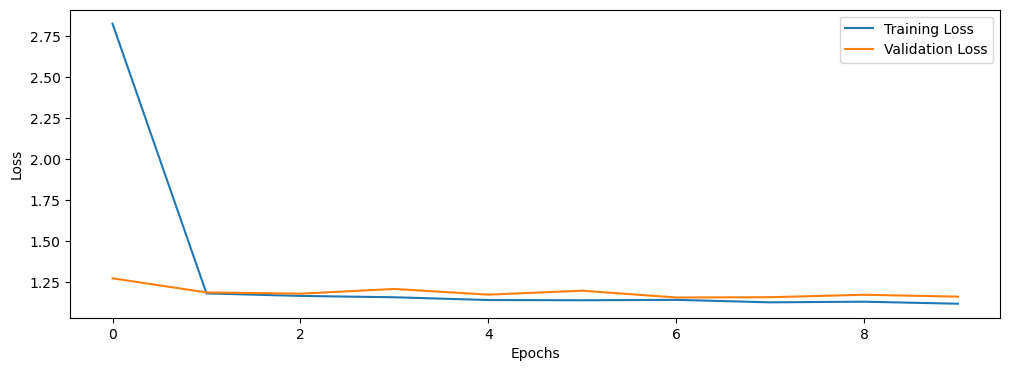

In [40]:
# Plot training and validation loss
plt.figure(figsize=(12, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


**There was lesser loss for Training than validation**

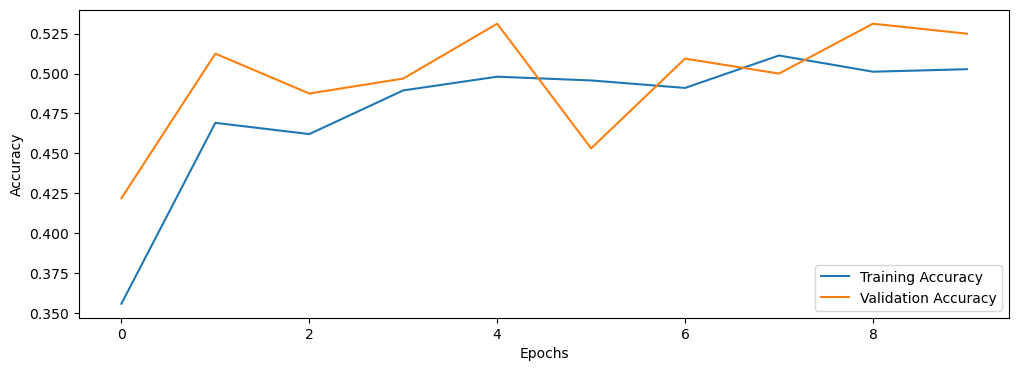

In [41]:

# Plot training and validation accuracy
plt.figure(figsize=(12, 4))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

**Over every epoch validation Acuuracy increases but it is quite notable that at close to epoch number 6 the validation accuracy suddenly decreased and rose at epoch number 8**

**Tf.keras was much more easier to implement than tf.estimators.For this particular project for reasons unknown tf.estimators gave a very low accuracy when compared to tf.keras**